# Regresión logística.

Comenzaremos a estudiar "Clasificación" empezando por la "regresión logística". En los algoritmos de clasificación (a diferencia de los regresión en donde se asociaba un número real a una entrada) se le  a cada entrada se le asigna un  elemento de un subconjunto finito de los naturales, es decir, una función  $f:\mathbb{R}^d \rightarrow{A}$, en donde $A \subset \mathbb{N}$. ESte tipo de algoritmos corresponden al "aprendizaje supervisado", ya que para generar el modelo necesitamos tener datos etiquetados, es decir, de loq ue sepamos cual es su valor de salida.

En el caso de la "Regresión logística" tenemos una función $h$ de $\mathbb{R}^d$ al intervalo $[0,1]$. Podemos interpretar $h(\boldsymbol{x})$ como la probabilidad de que la etiqueta de $\boldsymbol{x}$ sea $1$. La clase de hipótesis (o espacio de hipotesis) asociado a la regresión logística es la composición de una función sigmoide $\phi_{sig}: \mathbb{R} \rightarrow [0,1]$ sobre el conjunto de funciones lineales $L_d$. En particular, la función sigmoide utilizada en la regresión logística es la "función logística", definida como:
$$\phi_{sig}(z) = \frac{1}{1+e^{-z}}$$

El espacio de hipótesis es por lo tanto (la función o clase de hipótesis):
$$H_{sig} = \phi_{sig}\circ L_d = \{  \boldsymbol{x} \rightarrow \phi_{sig}(\boldsymbol{w} \cdot  \boldsymbol{x}) : \boldsymbol{w} \in \mathbb{R}^d \}$$

Nótese que cuando $\boldsymbol{w} \cdot  \boldsymbol{x}$ es muy grande entonces $\phi_{sig}(\boldsymbol{w} \cdot  \boldsymbol{x})$ es cercano a $1$, mientras que cuando $\boldsymbol{w} \cdot  \boldsymbol{x}$ es muy pequeño entonces $\phi_{sig}(\boldsymbol{w} \cdot  \boldsymbol{x})$ es cercano a $0$ 

La explicación de arriba se hizo para cuando tenemos solamente un dato $\boldsymbol{x}$, pero nosotros estaremos ingresando a la vez todos los datos, por lo que en lugar de un vector $\boldsymbol{x} \in \mathbb{R}^d$ tendremos una matriz $X \in \mathbb{R}^{n \times d}$, entonces nuestra función queda de la siguiente forma:
$$H_{sig} =  \phi_{sig}\circ L_d = \phi_{sig}(Xw)$$ 

con  $w \in \mathbb{R}^d$ y $\phi_{sig}$ se aplica entrada a entrada.


![](https://upload.wikimedia.org/wikipedia/commons/thumb/6/66/Funci%C3%B3n_sigmoide_01.svg/1280px-Funci%C3%B3n_sigmoide_01.svg.png)

Como podemos ver en la imagen de arriba, la gráfica de la función sigmoide tiene forma de "S", y de ahí su nombre. 

En el caso de la regresión logística se dice que es un clasificador lineal, ya que separa a los datos mediante una recta, plano e hiperplano para arrojar a que categoría pertenecen, y es por eso que este clasificador es binario. Veamos un ejemplo

![](https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fttsuchi.github.io%2Fnotebooks%2Fimages%2FPerceptron%2Fclassification.png&f=1&nofb=1)

En este caso decimos que los datos son linealmente separables ya que al dividirlos con una recta se clasifican correctamente, pero no todos los datos son así

![](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fleonardoaraujosantos.gitbooks.io%2Fartificial-inteligence%2Fcontent%2Fmore_images%2Flinear_vs_nonlinear_problems.png&f=1&nofb=1)

En este caso, en la segunda imagen, no sería bueno usar un clasificador lineal para clasificar esos datos.

En el caso de la regresión logística, el plano (hiperplano) o recta que separa a los datos está dado cuando $Xw = 0$, ya que en $0$ la función sigmoide vale $0.5$, entonces se pueden tomar que los valores que estan por encima del plano (hiperplano) o recta se les asocie $1$ (ya que la probabilidad de ser uno es $\geq 0.5$), mientras los que están debajo se les asocia un cero (ya que la probabilidad de ser uno es $< 0.5$), y el plano (hiperplano) o recta que los separa está dado por:

$$Xw = 0$$

Entonces necesitamos encontrar los valores de las entradas de $w$, y para eso tenemos que utilizar una función de error o costo (como en el caso de regresión lineal) y minimizarla. En esta caso contruirmenos una función de error para la regresión logística llamada "Binary Cross-Entropy".

Consideremos un predictor $\boldsymbol{x}$ y una variable binario o de Bernoulli $y$. Asumiendo que existe relación entre $\boldsymbol{x}$ y $y$ un modelo "ideal" predeciría:
$$P(y|\boldsymbol{x}) = (1\, sí\, y=0),\, (0 \, sí\, y=0)$$

Al usar la regresión logística, está probabilidad desconocida se modela como:

$$\hat{P}(y=1|\boldsymbol{x},\boldsymbol{w}) = \frac{1}{1+e^{-Xw}}$$

Nuestra meta es encontrar los parámetros $w$ tales que la porbabilidad modelada sea tan cercana como sea posible al uno verdadero.


Una forma forma de asegurar que tan bueno es calcular la función de verosimilitud (likelihhod function). Dadas $n$ muestras, esta función está definida como (por definición):
$$L(\boldsymbol{w}) = \prod_{i=1}^n \hat{P}(y_i|\boldsymbol{x_i};\boldsymbol{w})$$

Idealmente busvamos encontrar los parámetros $\boldsymbol{w}$ que maximicen $L(\boldsymbol{w})$. Esto es muchas veces complicado de hacer directamente, peropodemos trabajar con el logaritmo para simplificar las cosas

$$-log L(\boldsymbol{w}) = -\prod_{i=1}^n log \hat{P}(y_i|\boldsymbol{x_i};\boldsymbol{w}) ... (1)$$

Ya que la función logaritmo es una función monótona, minimizar esta función con logaritmo es equivalente a maximizar la función original.
Ahora calculamos $\hat{P}(y|\boldsymbol{x}, \boldsymbol{w})$
Sabemos que:
    $$\hat{P}(1, \boldsymbol{x}; \boldsymbol{w}) = 1- \hat{P}(0\boldsymbol{x};\boldsymbol{w})$$
    
Por las propiedades de la distribución de Bernoulli, sabemos que la función de probabilidad de esta distribución, con una posible salida $k$ puede ser expresada como:
$$f(k;p) = p^k(1-p)^{1-k}\, con \, k \in \{0,1\}$$
entonces oara nuestra salida $y$ podemos usar las expresiones anteriores quedando como resultado:
$$\hat{P}(y|\boldsymbol{x};\boldsymbol{w}) = \hat{P}(1|\boldsymbol{x};\boldsymbol{w})^y \hat{P}(0|\boldsymbol{x};\boldsymbol{w})^{1-y}...(2)$$
    
Sustituyendo (2) en (1), y normalizando por el número de datos $n$ se obtiene finalmente la binary cross-entropy

$$J(w) = -\frac{1}{n}\sum_{i=1}^n(y_ilog(\hat{P}(1, \boldsymbol{x_i}; \boldsymbol{w}))+(1_i-y_i)log(1-\hat{P}(0, \boldsymbol{x_i}; \boldsymbol{w}))$$

$$J(w)=-\frac{1}{n}\sum_{i=1}^n(y_i log(\phi_{sig}(Xw))_i+(1-y_i)log(1-\phi_{sig}(Xw)_i)$$


Se puede reescribir en termino de multiplicación de matrices de la siguiente forma:

$$J(w)=-\frac{1}{n}(y^T log(\phi_{sig}(Xw))+(1-y)^Tlog(1-\phi_{sig}(Xw)))...(3)$$

Una característica importante de esta función de error o costo es que es "convexa", por lo que podemos utilizar métodos convenciales de optimización como lo es el "descenso del gradiente". A continuación demostraremos que esta función es convexa.

Primero calculemos el gradiente con respecto a $w$ y para esto vamos a usar la regla de la cadena.
Primero notemos que $\phi_{sig}(x)^{\prime} = \phi_{sig}(x)(1-\phi_{sig}(x)) $ y nombremos a $z = \phi_{sig}(h)$ con $h = Xw$

Ahora calculamos lo siguiente:
$$\nabla_w J(w) = \frac{\partial J(w)}{\partial w} = \frac{\partial J(w)}{\partial z}\frac{\partial z}{\partial h}\frac{\partial h}{\partial w}$$

de (3) se sigue que (simplemente derivando:

$$\frac{\partial J(w)}{\partial z}= \frac{1}{n}((1-y)^T)(1-z)(z(1-z))^{-1} - y^Tz(z(1-z))^{-1}) = \frac{1}{n} (z-y)^T(z(1-z))^{-1}$$

$$\frac{\partial z}{\partial h} = z(1-z)$$

$$\frac{\partial h}{\partial w} = X$$

Finalmente queda que:

$$\nabla_w J(w) = \frac{\partial J(w)}{\partial w} = \frac{1}{n}(z-y)^TX$$
esta es una matriz de $1\times d$ pero nosotros queremos que sea de $d \times 1$, entonces simplemente lo transponemos quedando lo siguiente:

$$\nabla_w J(w) = \frac{1}{n} X^T(z-y)$$

$$\nabla_w J(w) = \frac{1}{n} X^T(\phi_{sig}(Xw)-y)$$


En calculo de una variable, cuando la segunda derivada de una función es positiva se tiene que esa función es convexa. En calculo multivariable hay una propiedad análoga, veamos las siguientes definiciones.

**Definición 1**: (Matriz Hessianna) Supongamos que $f:\mathbb{R^n} \rightarrow \mathbb{R}$. Si todas las segundas derivadas parciales de $f$ existen y son continuas sobre el dominio de la función, la matriz Hessianna $H$ de $f$ es una matriz cuadrada $n \times n$ definida como:

$$H_{i,j} = \frac{\partial^2f}{\partial x_i\partial x_j}$$

Es una matriz simétrica debido a la hipótesis de continuidad de las segundas derivadas parciales.

**Definición 2**: (Matriz positiva semi-definida) Una matriz de $n\times n$ real y simétrica $M$ se dice que es positiva semidefinida si $x^TMx\geq 0$ para todo $x \in \mathbb{R}^n$

Ya con estas definiciones, podmeos dar un  teorema que nos dirá cuando una función multivariable es convexa, en este caso nuestra función es un campon escalar.

**Teorema 1**: Una función $f:\mathbb{R}^n \rightarrow \mathbb{R}$ doblemente diferenciable, es convexa sí y solo sí la matriz Hessianna $H$ es positiva semidefinida.

Con la teoría dada anteriormente, simplemente basta probar que la matriz Hessianna de nuestra función $J$ es positiva semidefinida para concluir que nuestra función es convexa.

Para calcular la matriz Hessianna, simplemete tenemos que derivar $\frac{\partial\nabla_w J(w)}{\partial w}$, no es complicado hacerlo pero si un poco tardado, entonces se evita poner todo el cálculo para no alargar el notebook. Después de calcular la derivada, la Matrix Hessiana queda como:

$$H = X^TSX$$

en donde $S = \frac{1}{n}diag(\phi_{sig}(Xw)(1-\phi_{sig}(Xw)))$

Como $S$ es una matriz diagonal con valores reales positivoa, entonces existe una matriz diagonal $B$ tal que $BB = S$, es decir, una matriz donde las entradas de la diagonal son la raíz de las entradas de $S$. Como $S$ es diagonal $B$ es diagonal, y entonces $B^T= B$.

Con estas observaciones, ya estamos listos para demostrar que la matriz Hessiana de $J$ es positiva semidefinida.


**Proposición 1:** La matriz Hessiana de la función $J(w)$ es una matriz postitiva semidefinida.

**Demostración:**

Notemos que $H$ es una matriz de $d \times d$. Tomemos $x \in \mathbb{R}^d$

$$x^THx = x^TX^TSXx\\
       \quad  \quad \quad = x^TX^TBBXx\\
       \quad \quad \quad = x^TX^TB^TBXx\\
       \quad \quad \quad = (xXB)^TBXx\\
       \quad \quad  = \|BXx\|^2 \geq 0$$

Con lo que concluimos que $H$ es una matriz positiva semidefinida


**Como la matriz Hessiana $H$ de $J(w)$ es positiva semidefinida, utilizando el Teorema 1 concluimos que $J(w)$ es convexa**

Ya sabiendo que $J(w)$ es convexa podemos utilizar el método del descenso por el gradiente para minimizarla, el cuál es:

$$w_{n+1} = w_n-\alpha \nabla J(w_{n})$$

y para no tener problemas con la tasa de aprendizaje utilizaremos el método de "Barzilai-Borwein" para actualizar la tasa de aprendizaje 

$$  \alpha = \frac{\Delta g(w)^T\Delta w}{\Delta g(w)^T\Delta g(w)}$$
Con esto ya se logró obtener la forma en que se calculará el valor de $\alpha$ en cada iteración

donde  $\Delta g(w) = \nabla J(w_k)-\nabla J(w_{k-1})$

Ahora sí, hagamos la implementación computacional.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [4]:
#Primero definimos la función sigmoide
def sig(x):
    return 1/(1+np.exp(-x))

In [75]:
def descenso_gradiente_log(X,Y):
    weights = np.zeros((X.shape[1],1))
    iteraciones = 0
    learning_rate = 0.01
    n = X.shape[0]
    while True:
        weights_ant = weights
        weights = weights - learning_rate*(1/n)*np.matmul(X.T,(sig(np.matmul(X,weights))-Y))
        delta_g = (1/n)*np.matmul(X.T,(sig(np.matmul(X,weights))-Y))- (1/n)*np.matmul(X.T,(sig(np.matmul(X,weights_ant))-Y))
        delta_theta = weights - weights_ant
        learning_rate = (np.matmul(delta_g.T,delta_theta)/np.matmul(delta_g.T,delta_g))
        iteraciones = iteraciones + 1
        if abs(delta_theta.sum())<=1e-8:
            break
        
    return weights, iteraciones

In [76]:
dataset = pd.read_csv("data_log.csv")

In [77]:
dataset

,Age,EstimatedSalary,Purchased
0,-1.781797,-1.490046,0.0
1,-0.253587,-1.460681,0.0
2,-1.113206,-0.785290,0.0
3,-1.017692,-0.374182,0.0
4,-1.781797,0.183751,0.0
...,...,...,...
395,0.797057,-0.844019,1.0
396,1.274623,-1.372587,1.0
397,1.179110,-1.460681,1.0
398,-0.158074,-1.078938,0.0


In [78]:
X = dataset.iloc[:,0:2].values
y = dataset.iloc[:,-1].values.reshape(-1,1)

In [79]:
y.shape

(400, 1)

In [80]:
def colores_func(y):
    a = []
    for i in y:
        if i ==0:
            a.append("green")
        else:
            a.append("red")
            
    return a
        

In [81]:
mapa_colores = colores_func(y.ravel())

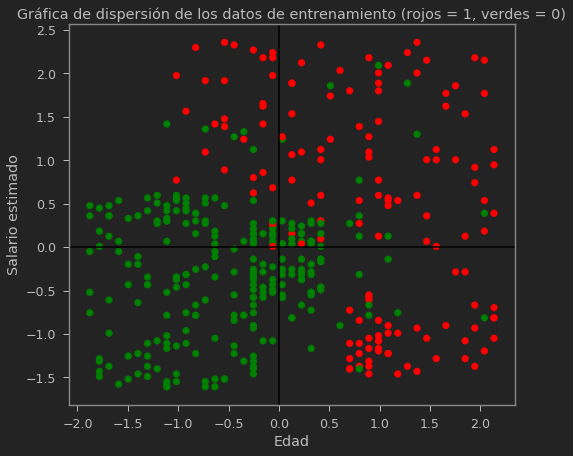

In [82]:

plt.scatter(X[:,0],X[:,1], c=mapa_colores) #Hacemos una gráfica de dispersión
plt.axhline(y=0, c="black") #Dibujamos los ejes coordenados de color negro.
plt.axvline(x=0, c="black")
plt.xlabel("Edad")
plt.ylabel("Salario estimado")
plt.title("Gráfica de dispersión de los datos de entrenamiento (rojos = 1, verdes = 0)")
plt.show()

In [83]:
x_ones = np.ones((X.shape[0],1))
X = np.concatenate((x_ones,X), axis = 1)

In [84]:
X

array([[ 1.        , -1.78179743, -1.49004624],
       [ 1.        , -0.25358736, -1.46068138],
       [ 1.        , -1.11320552, -0.78528968],
       ...,
       [ 1.        ,  1.17910958, -1.46068138],
       [ 1.        , -0.15807423, -1.07893824],
       [ 1.        ,  1.08359645, -0.99084367]])

In [85]:
w = descenso_gradiente_log(X,y)

In [88]:
w

(array([[-1.13812197],
        [ 2.44457954],
        [ 1.22258176]]),
 20)

In [92]:
dominio_recta = np.linspace(-2,2,1000)
recta = [-w[0][0][0]/w[0][2][0]- w[0][1][0]/w[0][2][0]*i for i in dominio_recta ]

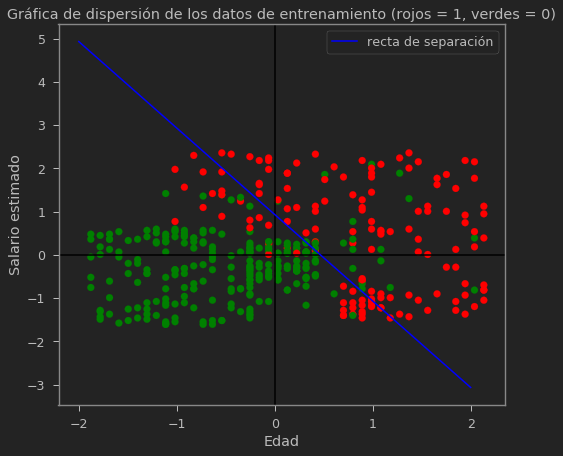

In [94]:
plt.scatter(X[:,1],X[:,2], c=mapa_colores) #Hacemos una gráfica de dispersión
plt.axhline(y=0, c="black") #Dibujamos los ejes coordenados de color negro.
plt.axvline(x=0, c="black")
plt.plot(dominio_recta, recta, label ="recta de separación", color = "blue")
plt.xlabel("Edad")
plt.ylabel("Salario estimado")
plt.title("Gráfica de dispersión de los datos de entrenamiento (rojos = 1, verdes = 0)")
plt.legend()
plt.show()

In [95]:
pred = sig(np.matmul(X,w[0]))

In [102]:
def pred_clas(a):
    b = []
    for i in a:
        if i<0.5:
            b.append(0)
        else:
            b.append(1)
    return b 

In [103]:
pred_clases = pred_clas(pred)

In [104]:
print(pred_clases)

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 

In [107]:
mapa_colores_2 = colores_func(pred_clases)

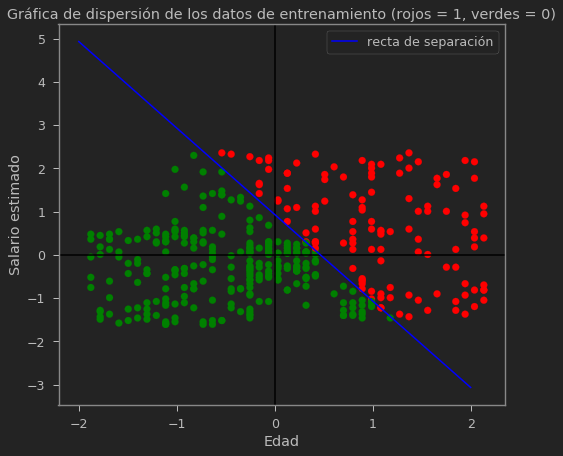

In [108]:
plt.scatter(X[:,1],X[:,2], c=mapa_colores_2) #Hacemos una gráfica de dispersión
plt.axhline(y=0, c="black") #Dibujamos los ejes coordenados de color negro.
plt.axvline(x=0, c="black")
plt.plot(dominio_recta, recta, label ="recta de separación", color = "blue")
plt.xlabel("Edad")
plt.ylabel("Salario estimado")
plt.title("Gráfica de dispersión de los datos de entrenamiento (rojos = 1, verdes = 0)")
plt.legend()
plt.show()